## 1. Read images/files and labeling

## 2. Data Augmentation


In [5]:
import numpy as np
import pandas as pd
import cv2 as cv

from matplotlib.image import imread
import matplotlib.pyplot as plt

import os
from os import listdir
from os.path import isfile, join

### Read data

In [6]:
os.getcwd() + os.sep + "data" + os.sep

'c:\\Users\\Usuario\\Desktop\\The_Bridge\\the_bridge_bootcamp\\week12_DL\\day3_DL_utils\\read_images_data_augmentation\\data\\'

In [7]:
data_path = os.getcwd() + os.sep + "data" + os.sep
only_image_names = [f for f in listdir(data_path) if isfile(join(data_path, f))]
images_no_mask = {}
images_mask_wb = {}
images_mask_color = {}
df_dict = []
for image_name in only_image_names:
    if ".png" in image_name:
        image_fullpath = data_path + image_name
        image_cv = cv.imread(image_fullpath, 0) # con 0 leemos en blanco y negro, si no ponemos nada es a color
        # Ya que cada una de las imágenes puede tener resoluciones diferentes, redimensiono las imagenes para que todas tengan las mismas
        # que será la mínima
        image_cv = cv.resize(image_cv, (211, 211))
        #print(image_cv.shape)
        if "msk" in image_name:
            df_dict.append({"Image":image_cv, "Label":1, "Fullpath":image_fullpath })
            images_mask_wb[image_fullpath] = 1  # esto no hace falta
        elif "preview" in image_name:
            df_dict.append({"Image":image_cv, "Label":2, "Fullpath":image_fullpath})
            images_mask_color[image_fullpath] = 2 # esto no hace falta
        else:
            df_dict.append({"Image":image_cv, "Label":0, "Fullpath":image_fullpath})
            images_no_mask[image_fullpath] = 0 # esto no hace falta
        

df = pd.DataFrame(df_dict)
df.head()

,Image,Label,Fullpath
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,c:\Users\Usuario\Desktop\The_Bridge\the_bridge...
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,c:\Users\Usuario\Desktop\The_Bridge\the_bridge...
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2,c:\Users\Usuario\Desktop\The_Bridge\the_bridge...
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,c:\Users\Usuario\Desktop\The_Bridge\the_bridge...
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,c:\Users\Usuario\Desktop\The_Bridge\the_bridge...


In [8]:
X = np.stack(np.array(df["Image"]))
y = np.array(df["Label"])
print(X.shape)
print(y.shape)

(24, 211, 211)
(24,)


In [9]:
X[0].shape

(211, 211)

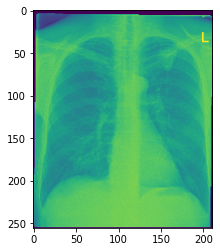

In [10]:
# Fullpath es la imagen original
image = imread(df["Fullpath"][0])
plt.imshow(image)
plt.show()

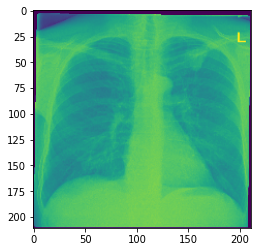

In [11]:
from PIL import Image

# la imagen después del resize
img = Image.fromarray(X[0])
plt.imshow(img)
plt.show()


In [12]:
X.shape

(24, 211, 211)

In [13]:
# 1 al final para decirle que es en blanco y negro
X_train = X.reshape(24,211,211,1)
X_train.shape

(24, 211, 211, 1)

## Data Augmentation

1. https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html


2. https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

In [18]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen  = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',    #reñenar valores nan con los más cercanos
        rescale=1./255) #normalizamos, el único parámetro que es obligatorio

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

i = 0
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
for batch in train_datagen.flow(X_train, batch_size=1, save_to_dir='preview', save_format='png'):
    i += 1
    if i > 10:
        break

# asi tenemos más imágenes. Ahora le asignaríamos un label específico